In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sklearn as sk
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

# PCA Analysis

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [5]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.33)

In [6]:
print(X_train.shape,X_test.shape)

(100, 4) (50, 4)


In [7]:
n_train,n_features = X_train.shape
n_test = X_test.shape[0]

In [8]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(X_train)

In [9]:
prin_comp.shape

(100, 2)

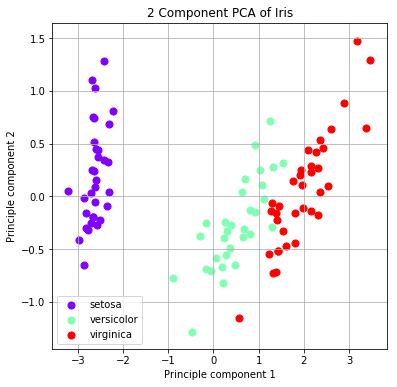

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principle component 1")
ax.set_ylabel("Principle component 2")
ax.set_title("2 Component PCA of Iris")
colors = cm.rainbow(np.linspace(0,1,len(iris.target_names)))
for target_id,target in enumerate(iris.target_names):
    index_v = y_train == target_id
    ax.scatter(prin_comp[index_v,0],prin_comp[index_v,1],c=colors[target_id],cmap='viridis',s=50)
ax.legend(iris.target_names)
ax.axis('tight')
ax.grid()

In [11]:
pca.components_

array([[ 0.33228033, -0.09719352,  0.86342958,  0.36692311],
       [ 0.64606717,  0.74811223, -0.14130372, -0.05439269]])

In [12]:
pca.mean_

array([5.834, 3.055, 3.761, 1.198])

In [14]:
pca.get_covariance()

array([[ 0.58588604, -0.02383638,  1.12890353,  0.48053641],
       [-0.02383638,  0.21264975, -0.35910792, -0.15168312],
       [ 1.12890353, -0.35910792,  3.04226108,  1.27027877],
       [ 0.48053641, -0.15168312,  1.27027877,  0.59242939]])